# Numerical Integration

### Implementation of needed functions

In [1]:
import math
# import sys
# sys.setrecursionlimit(5000)

def f(x):
    return x**10 * (2 - x) * (1 - math.exp(20 * (x - 1)))

def integrate_trapezoidally(f, lims, n=10000):
    h = (lims[1] - lims[0]) / n
    sum_element = 0
    for i in range(1, n):
        sum_element += f(h * i + lims[0])
    return h * (f(lims[0]) + 2 * sum_element + f(lims[1])) / 2

def integrate_rombergly(f, lims, n=1000, K=10):
    table = []
    estimates = []
    for k in range(K):
        estimates += [integrate_trapezoidally(f, lims, n=2**k * n)]
    table += [estimates]
    for k in range(1, K):
        estimates = []
        for j in range(0, K - k):
            estimates += [(4**k * table[k - 1][j + 1] - table[k - 1][j]) / (4**k - 1)]
        table += [estimates]
    return table[-1][-1]

def integrate_gauss_quad(f, lims, n=10000):
    h = (lims[1] - lims[0]) / n
    r0 = -math.sqrt((15 + 2*math.sqrt(30)) / 35)
    r1 = -math.sqrt((15 - 2*math.sqrt(30)) / 35)
    r2 = math.sqrt((15 - 2*math.sqrt(30)) / 35)
    r3 = math.sqrt((15 + 2*math.sqrt(30)) / 35)
    c0 = (18 - math.sqrt(30)) / 36
    c1 = (18 + math.sqrt(30)) / 36
    c2 = (18 + math.sqrt(30)) / 36
    c3 = (18 - math.sqrt(30)) / 36
    integral = 0
    for i in range(n):
        cur_lims = [lims[0] + i * h, lims[0] + i * h + h]
        integral += ((cur_lims[1] - cur_lims[0]) / 2) * (c0 * f(((cur_lims[1] - cur_lims[0]) / 2) * r0 + ((cur_lims[0] + cur_lims[1]) / 2)) + c1 * f(((cur_lims[1] - cur_lims[0]) / 2) * r1 + ((cur_lims[0] + cur_lims[1]) / 2)) + c2 * f(((cur_lims[1] - cur_lims[0]) / 2) * r2 + ((cur_lims[0] + cur_lims[1]) / 2)) + c3 * f(((cur_lims[1] - cur_lims[0]) / 2) * r3 + ((cur_lims[0] + cur_lims[1]) / 2)))
    return integral

def integrate_adaptively(f, lims, error_threshold=0.00001, n_per_section=100):
    old = integrate_trapezoidally(f, lims, n=n_per_section)
    new = integrate_trapezoidally(f, lims, n=2*n_per_section)
    try:
        relative_error = math.fabs((new - old) / old)
    except:
        relative_error = 100
    if relative_error < error_threshold: return new + (1/15) * (new - old)
    integral_1 = integrate_adaptively(f, [lims[0], lims[0] + (lims[1] - lims[0]) / 2], error_threshold)
    integral_2 = integrate_adaptively(f, [lims[1] - (lims[1] - lims[0]) / 2, lims[1]], error_threshold)
    return integral_1 + integral_2

### Solving integral using methods from parts (a), (b), (c) and (d) with default parameters

In [12]:
print("Trapezoidal method integral estimation", integrate_trapezoidally(f, [0, 1]))
print("Romberg method integral estimation", integrate_rombergly(f, [0, 1]))
print("Gauss quadrature method integral estimation", integrate_gauss_quad(f, [0, 1]))
print("Adaptive quadrature method integral estimation", integrate_adaptively(f, [0, 1]))

Trapezoidal method integral estimation 0.06446180372912268
Romberg method integral estimation 0.06446182039578559
Gauss quadrature method integral estimation 0.06446182039577894
Adaptive quadrature method integral estimation 0.06446183918022441


### Precision analysis (e)

In [2]:
from scipy.integrate import quad

scipy_integral = quad(f, 0, 1)
print("Scipy integration result:", scipy_integral[0])
print("Scipy integration error upper bound:", scipy_integral[1])

Scipy integration result: 0.06446182039578609
Scipy integration error upper bound: 9.707454602748885e-13


Applying scipy integration I got the above result with e-13 precision. I will use this result in further analysis as reference.

#### Trapezoidal integration analysis

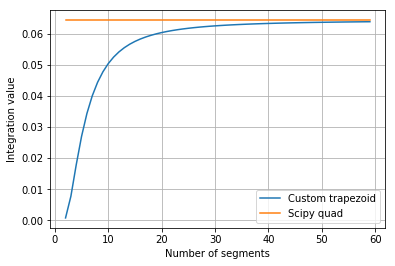

In [4]:
from matplotlib import pyplot as plt

n_range = range(2, 60)
plt.plot([i for i in n_range], [integrate_trapezoidally(f, [0, 1], n=i) for i in n_range], label="Custom trapezoid")
plt.plot([i for i in n_range], [scipy_integral[0] for _ in n_range], label="Scipy quad")
plt.xlabel("Number of segments")
plt.ylabel("Integration value")
plt.grid()
plt.legend()
plt.show()

Further analysis to find limiting asymptote of trapezoid method using more segments.

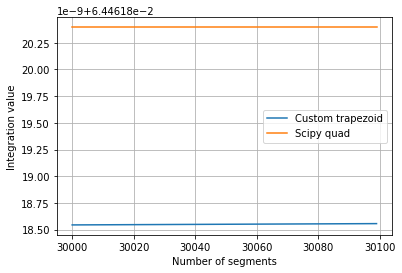

In [15]:
n_range = range(30000, 30100)
plt.plot([i for i in n_range], [integrate_trapezoidally(f, [0, 1], n=i) for i in n_range], label="Custom trapezoid")
plt.plot([i for i in n_range], [scipy_integral[0] for _ in n_range], label="Scipy quad")
plt.xlabel("Number of segments")
plt.ylabel("Integration value")
plt.grid()
plt.legend()
plt.show()

From above plot it can be seen that the difference between scipy and trapezoid values is about 1.75e-9. So upper bound of absolute precision of my trapezoidal integration is the sum of absolute difference of scipy and trapezoid values plus upper bound of absolute error of scipy integration. Roughly, error of my trapezoid implementation is 1.7509e-9 and absolute precision is e-9.

#### Romberg integration analysis

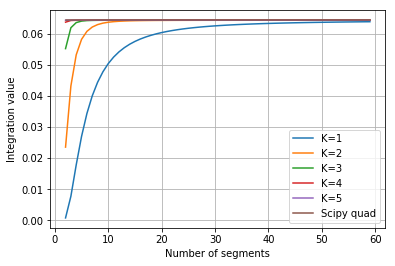

In [16]:
n_range = range(2, 60)
plt.plot([i for i in n_range], [integrate_rombergly(f, [0, 1], n=i, K=1) for i in n_range], label="K=1")
plt.plot([i for i in n_range], [integrate_rombergly(f, [0, 1], n=i, K=2) for i in n_range], label="K=2")
plt.plot([i for i in n_range], [integrate_rombergly(f, [0, 1], n=i, K=3) for i in n_range], label="K=3")
plt.plot([i for i in n_range], [integrate_rombergly(f, [0, 1], n=i, K=4) for i in n_range], label="K=4")
plt.plot([i for i in n_range], [integrate_rombergly(f, [0, 1], n=i, K=5) for i in n_range], label="K=5")
plt.plot([i for i in n_range], [scipy_integral[0] for _ in n_range], label="Scipy quad")
plt.xlabel("Number of segments")
plt.ylabel("Integration value")
plt.grid()
plt.legend()
plt.show()

Above plot clearly shows that increasing K improves convergence rate powerly (adding power degrees), so as decreasing error rate. It confirms the error to K dependency estimation, where each K adds 2 degrees to the power of h.

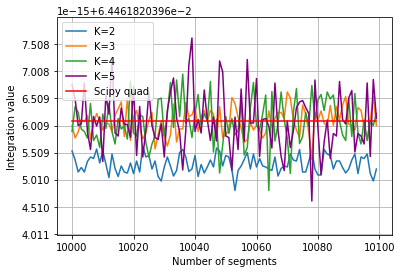

In [48]:
n_range = range(10000, 10100)
plt.plot([i for i in n_range], [integrate_rombergly(f, [0, 1], n=i, K=2) for i in n_range], label="K=2")
plt.plot([i for i in n_range], [integrate_rombergly(f, [0, 1], n=i, K=3) for i in n_range], label="K=3")
plt.plot([i for i in n_range], [integrate_rombergly(f, [0, 1], n=i, K=4) for i in n_range], label="K=4")
plt.plot([i for i in n_range], [integrate_rombergly(f, [0, 1], n=i, K=5) for i in n_range], label="K=5", color="purple")
plt.plot([i for i in n_range], [scipy_integral[0] for _ in n_range], label="Scipy quad", color="red")
plt.ylim(7.84e-13+6.4461820395e-2, 7.88e-13+6.4461820395e-2)
plt.xlabel("Number of segments")
plt.ylabel("Integration value")
plt.grid()
plt.legend()
plt.show()

Romberg integration have 2 parameters: number of trapezoid segments n and estimation depth K. Above plot shows integral estimations using relatively high n (10000) and low K values. The behavior of functions is fluctuative and in general, for K = 3, 4 and 5 average values of integration are similar to the reference integration. So, K > 2 is roughly enough.

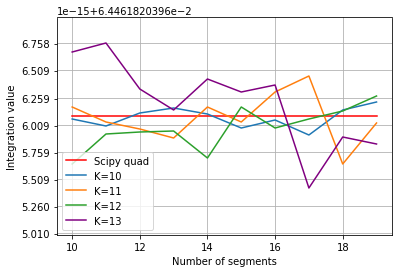

In [51]:
n_range = range(10, 20)
plt.plot([i for i in n_range], [scipy_integral[0] for _ in n_range], label="Scipy quad", color="red")
plt.plot([i for i in n_range], [integrate_rombergly(f, [0, 1], n=i, K=10) for i in n_range], label="K=10")
plt.plot([i for i in n_range], [integrate_rombergly(f, [0, 1], n=i, K=11) for i in n_range], label="K=11")
plt.plot([i for i in n_range], [integrate_rombergly(f, [0, 1], n=i, K=12) for i in n_range], label="K=12")
plt.plot([i for i in n_range], [integrate_rombergly(f, [0, 1], n=i, K=13) for i in n_range], label="K=13", color="purple")
plt.ylim(7.85e-13+6.4461820395e-2, 7.87e-13+6.4461820395e-2)
plt.xlabel("Number of segments")
plt.ylabel("Integration value")
plt.grid()
plt.legend()
plt.show()

For low trapezoid n parameter from 10 to 20 and relatively higher K parameters, the upper bound of error is similar (slighlty better) as in previous analysis. In the worst case the absolute difference was about 1.5e-15, so in general precision is about 9.715e-13.

#### Gauss quadrature method

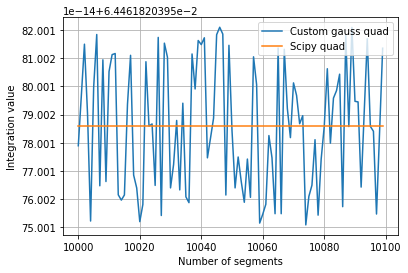

In [17]:
n_range = range(10000, 10100)
plt.plot([i for i in n_range], [integrate_gauss_quad(f, [0, 1], n=i) for i in n_range], label="Custom gauss quad")
plt.plot([i for i in n_range], [scipy_integral[0] for _ in n_range], label="Scipy quad")
plt.xlabel("Number of segments")
plt.ylabel("Integration value")
plt.grid()
plt.legend()
plt.show()

Applying gauss quadrature algorithm with 10000 segments scipy reference error scale is 1e-14.

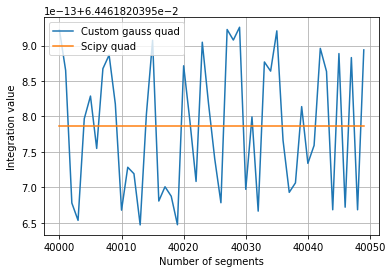

In [18]:
n_range = range(40000, 40050)
plt.plot([i for i in n_range], [integrate_gauss_quad(f, [0, 1], n=i) for i in n_range], label="Custom gauss quad")
plt.plot([i for i in n_range], [scipy_integral[0] for _ in n_range], label="Scipy quad")
plt.xlabel("Number of segments")
plt.ylabel("Integration value")
plt.grid()
plt.legend()
plt.show()

However, for higher n values such as 20000 and 40000, error scale degrades to 1e-13. In worst case it was about 1.5e-13, as the result the upper bound of error is 1.12e-12.

#### Adaptive quadrature

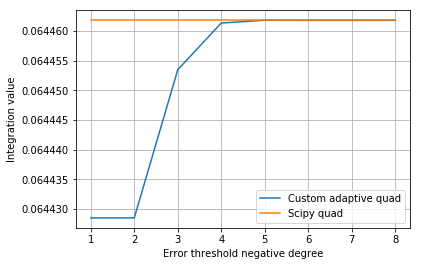

In [19]:
n_range = range(1, 9)
plt.plot([i for i in n_range], [integrate_adaptively(f, [0, 1], error_threshold=10**-i) for i in n_range], label="Custom adaptive quad")
plt.plot([i for i in n_range], [scipy_integral[0] for _ in n_range], label="Scipy quad")
plt.xlabel("Error threshold negative degree")
plt.ylabel("Integration value")
plt.grid()
plt.legend()
plt.show()

Varying error threshold parameter above plot was obtained. After e-5 changes are not visible.

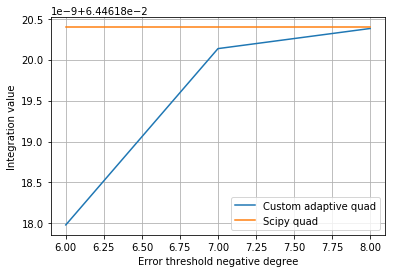

In [7]:
n_range = range(6, 9)
plt.plot([i for i in n_range], [integrate_adaptively(f, [0, 1], error_threshold=10**-i, n_per_section=1000) for i in n_range], label="Custom adaptive quad")
plt.plot([i for i in n_range], [scipy_integral[0] for _ in n_range], label="Scipy quad")
plt.xlabel("Error threshold negative degree")
plt.ylabel("Integration value")
plt.grid()
plt.legend()
plt.show()

Extending analysis, e-9 scale was reached with trapezoids per segment parameter set to 1000.

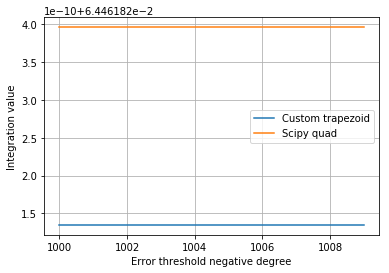

In [12]:
n_range = range(1000, 1010)
plt.plot([i for i in n_range], [integrate_adaptively(f, [0, 1], error_threshold=10**-7, n_per_section=i) for i in n_range], label="Custom trapezoid")
plt.plot([i for i in n_range], [scipy_integral[0] for _ in n_range], label="Scipy quad")
plt.xlabel("Error threshold negative degree")
plt.ylabel("Integration value")
plt.grid()
plt.legend()
plt.show()

Varying n_per_section parameter does not change the result. Therefore the main parameter of adaptive quadrature is error_threshold which can be set to very small number, and it's guaranteed that the absolute error will be less than it. So basically, Adaptive quadrature is the most accurate, however setting threshold to values more than e-8 takes huge amounts of time to perform computation, even with higher n_per_section parameter.

### Computational cost

Computational cost is proportional to execution time in most cases. To determine method which reach the highest accuracy with the least amount of computational cost we can multiply execution time to error value. Method with lowest index will be considered as most practicable way to integrate function. The parameters with best accuracies should be run.

In [13]:
import time

start_time = time.time()
integrate_trapezoidally(f, [0, 1], n=30000)
print("Trapezoid time is %s seconds ---" % (time.time() - start_time))
start_time = time.time()
integrate_rombergly(f, [0, 1], n=20, K=10)
print("Romberg time is %s seconds ---" % (time.time() - start_time))
start_time = time.time()
integrate_gauss_quad(f, [0, 1], n=10000)
print("Gauss quad time is %s seconds ---" % (time.time() - start_time))

Trapezoid time is 0.03299999237060547 seconds ---
Romberg time is 0.02200007438659668 seconds ---
Gauss quad time is 0.05500006675720215 seconds ---


Adaptive quad method is not included since it can reach e-9 scale in 10 seconds, although it can reach any precision.

Index for trapezoid method is 5.76e-11, for romberg it is 2.14e-14 and for gauss quadrature it is 8.25e-15. So the best algorithm in terms of both complexity and accuracy was Gauss Quadrature method. 